# **TAREA NÚMERO 6-EJERCICIO KNN- PROBLEMA "Students Grading Analysis"**

In [2]:
#Empiezo a visualizar primero los datos de la base de datos de Kaggle
from google.colab import drive
import polars as pl

# Montar Google Drive (si el archivo está ahí)
drive.mount('/content/drive')

# Cargar el CSV
df = pl.read_csv('Students_Grading_Dataset_Biased.csv')

Mounted at /content/drive


In [3]:
df.head()

Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
str,str,str,str,str,i64,str,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,str,str,str,str,i64,f64
"""S1000""","""Omar""","""Williams""","""student0@university.com""","""Female""",22,"""Engineering""",52.29,55.03,57.82,84.22,74.06,3.99,85.9,56.09,"""F""",6.2,"""No""","""Yes""","""High School""","""Medium""",5,4.7
"""S1001""","""Maria""","""Brown""","""student1@university.com""","""Male""",18,"""Engineering""",97.27,97.23,45.8,null,94.24,8.32,55.65,50.64,"""A""",19.0,"""No""","""Yes""","""None""","""Medium""",4,9.0
"""S1002""","""Ahmed""","""Jones""","""student2@university.com""","""Male""",24,"""Business""",57.19,67.05,93.68,67.7,85.7,5.05,73.79,70.3,"""D""",20.7,"""No""","""Yes""","""Master's""","""Low""",6,6.2
"""S1003""","""Omar""","""Williams""","""student3@university.com""","""Female""",24,"""Mathematics""",95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,"""A""",24.8,"""Yes""","""Yes""","""High School""","""High""",3,6.7
"""S1004""","""John""","""Smith""","""student4@university.com""","""Female""",23,"""CS""",54.18,46.59,78.89,96.85,83.7,5.97,68.42,66.13,"""F""",15.4,"""Yes""","""Yes""","""High School""","""High""",2,7.1


In [4]:
df.schema

Schema([('Student_ID', String),
        ('First_Name', String),
        ('Last_Name', String),
        ('Email', String),
        ('Gender', String),
        ('Age', Int64),
        ('Department', String),
        ('Attendance (%)', Float64),
        ('Midterm_Score', Float64),
        ('Final_Score', Float64),
        ('Assignments_Avg', Float64),
        ('Quizzes_Avg', Float64),
        ('Participation_Score', Float64),
        ('Projects_Score', Float64),
        ('Total_Score', Float64),
        ('Grade', String),
        ('Study_Hours_per_Week', Float64),
        ('Extracurricular_Activities', String),
        ('Internet_Access_at_Home', String),
        ('Parent_Education_Level', String),
        ('Family_Income_Level', String),
        ('Stress_Level (1-10)', Int64),
        ('Sleep_Hours_per_Night', Float64)])

In [5]:
#En este caso tendré en mente la visualización de los expuestos en clase teniendo:
df2 = df.select(['Grade', 'Stress_Level (1-10)', 'Internet_Access_at_Home', 'Study_Hours_per_Week', 'Family_Income_Level'])
df2

Grade,Stress_Level (1-10),Internet_Access_at_Home,Study_Hours_per_Week,Family_Income_Level
str,i64,str,f64,str
"""F""",5,"""Yes""",6.2,"""Medium"""
"""A""",4,"""Yes""",19.0,"""Medium"""
"""D""",6,"""Yes""",20.7,"""Low"""
"""A""",3,"""Yes""",24.8,"""High"""
"""F""",2,"""Yes""",15.4,"""High"""
…,…,…,…,…
"""D""",10,"""Yes""",25.5,"""Low"""
"""C""",4,"""Yes""",5.0,"""Medium"""
"""A""",4,"""No""",24.8,"""Medium"""


In [6]:
'''Visualizando la columna "Family_Income_Level" observo que existen varias etiquetas de "Medium" por lo que
procederé por medio un conteo a obsrevar cuál es la frecuencia de e ste componente.'''

# 1. Calcula la frecuencia absoluta (conteo de cada valor)
frecuencia_absoluta = df2['Family_Income_Level'].value_counts()

print(frecuencia_absoluta)


shape: (3, 2)
┌─────────────────────┬───────┐
│ Family_Income_Level ┆ count │
│ ---                 ┆ ---   │
│ str                 ┆ u32   │
╞═════════════════════╪═══════╡
│ Low                 ┆ 1983  │
│ Medium              ┆ 1973  │
│ High                ┆ 1044  │
└─────────────────────┴───────┘


Se visualiza que se repite más el componente **Low** con un conteo de **1983** en la variable del nivel de ingreso familiar, seguido posteriormente por el componente **medium** con un conteo de **1973** y posteriormente un componente **High** con un conteo de **1044**, teniendo presente la siguiente gráfica:

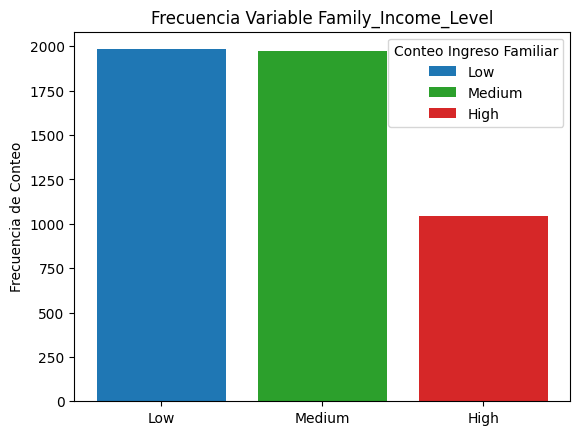

In [7]:
import matplotlib.pyplot as plt

# Datos
x = ["Low", "Medium", "High"]
y = [1983, 1973, 1044]

bar_labels = ['Low', 'Medium', 'High']
bar_colors = ['tab:blue', 'tab:green', 'tab:red']

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, label=bar_labels, color=bar_colors)

# Etiquetas de la gráfica
ax.set_ylabel('Frecuencia de Conteo')
ax.set_title('Frecuencia Variable Family_Income_Level')
ax.legend(title='Conteo Ingreso Familiar')

plt.show()

Ahora voy a proceder a analizar el componente de los niveles de los recursos familiares generando el desglosge visto en clase, teniendo:

In [8]:

# Define income levels in orden
income_levels = ["Low", "Medium", "High"]

# Crea un acumulativo de one-hot encoding
df3 = df2.with_columns([
    (df2["Family_Income_Level"].is_in(income_levels[i:])).cast(pl.Int8).alias(f"Income_{level}")
    for i, level in enumerate(income_levels)
])

# Drop the original categorical column
#df3 = df3.drop("Family_Income_Level")

print(df3.head())
df3.schema

shape: (5, 8)
┌───────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬────────────┐
│ Grade ┆ Stress_Lev ┆ Internet_A ┆ Study_Hour ┆ Family_Inc ┆ Income_Low ┆ Income_Med ┆ Income_Hig │
│ ---   ┆ el (1-10)  ┆ ccess_at_H ┆ s_per_Week ┆ ome_Level  ┆ ---        ┆ ium        ┆ h          │
│ str   ┆ ---        ┆ ome        ┆ ---        ┆ ---        ┆ i8         ┆ ---        ┆ ---        │
│       ┆ i64        ┆ ---        ┆ f64        ┆ str        ┆            ┆ i8         ┆ i8         │
│       ┆            ┆ str        ┆            ┆            ┆            ┆            ┆            │
╞═══════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╡
│ F     ┆ 5          ┆ Yes        ┆ 6.2        ┆ Medium     ┆ 1          ┆ 1          ┆ 0          │
│ A     ┆ 4          ┆ Yes        ┆ 19.0       ┆ Medium     ┆ 1          ┆ 1          ┆ 0          │
│ D     ┆ 6          ┆ Yes        ┆ 20.7       ┆ Low        ┆ 1          ┆ 0 

Schema([('Grade', String),
        ('Stress_Level (1-10)', Int64),
        ('Internet_Access_at_Home', String),
        ('Study_Hours_per_Week', Float64),
        ('Family_Income_Level', String),
        ('Income_Low', Int8),
        ('Income_Medium', Int8),
        ('Income_High', Int8)])

In [9]:
df3.select(["Family_Income_Level",'Income_Low', 'Income_Medium', 'Income_High'])

Family_Income_Level,Income_Low,Income_Medium,Income_High
str,i8,i8,i8
"""Medium""",1,1,0
"""Medium""",1,1,0
"""Low""",1,0,0
"""High""",1,1,1
"""High""",1,1,1
…,…,…,…
"""Low""",1,0,0
"""Medium""",1,1,0
"""Medium""",1,1,0


Ahora en este ítem revisaré la función `hstack()` donde desarrollo un apilamiento horizontal que genera una concatenación de columnas del dataframe original obtenido de df3 con el resultado de las variables dummy, donde finalmente por medio de la variable df4 tendré todas las columnas originales del df3 + las nuevas columnas dummy del grade.

Adicionalmente en este punto visualizaré a df3 teniendo presente `select("Grade")` que permite la selección de la columna `Grade` del DataFrame df3 y la función `to_dummies()` que convierte la columna categórica  `Grade` en variables dummy (one-hot-encoding). Teniendo presente que si `Grade` tiene valores como A,B y C se crearán nuevas columnas como:

|  Grade   | Grade A | Grade B | Grade C |
|----------|---------|---------|---------|
|     A    |    1    |    0    |    0    |
|     B    |    0    |    1    |    0    |
|     C    |    0    |    0    |    1    |

In [10]:
df4 = df3.hstack(df3.select("Grade").to_dummies())
df4.schema

Schema([('Grade', String),
        ('Stress_Level (1-10)', Int64),
        ('Internet_Access_at_Home', String),
        ('Study_Hours_per_Week', Float64),
        ('Family_Income_Level', String),
        ('Income_Low', Int8),
        ('Income_Medium', Int8),
        ('Income_High', Int8),
        ('Grade_A', UInt8),
        ('Grade_B', UInt8),
        ('Grade_C', UInt8),
        ('Grade_D', UInt8),
        ('Grade_F', UInt8)])

In [11]:
df4.select(['Grade','Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_F'])

Grade,Grade_A,Grade_B,Grade_C,Grade_D,Grade_F
str,u8,u8,u8,u8,u8
"""F""",0,0,0,0,1
"""A""",1,0,0,0,0
"""D""",0,0,0,1,0
"""A""",1,0,0,0,0
"""F""",0,0,0,0,1
…,…,…,…,…,…
"""D""",0,0,0,1,0
"""C""",0,0,1,0,0
"""A""",1,0,0,0,0


# **Primer Punto:** ¿Cómo puedes evaluar la hipótesis de que el problema de que casi todas las predicciones den `Medium` se debe a la desproporción de datos en esa columna?

Como se visualizó anteriormente en el histograma que se expuso, se observa que la columna `Family_Income_Level` tiene una distribución desproporcionada, se procede a compartir nuevamente la información gráfica:

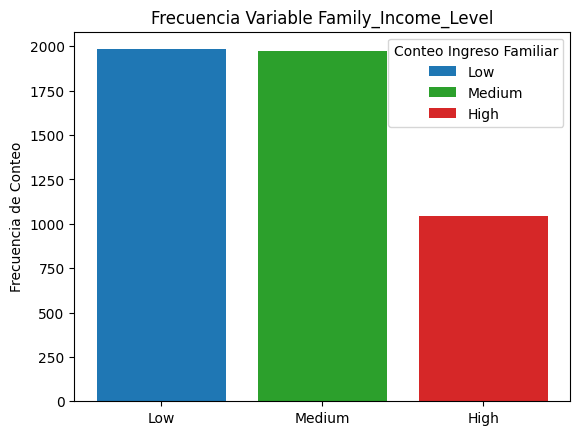

In [12]:
import matplotlib.pyplot as plt

# Datos
x = ["Low", "Medium", "High"]
y = [1983, 1973, 1044]

bar_labels = ['Low', 'Medium', 'High']
bar_colors = ['tab:blue', 'tab:green', 'tab:red']

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, label=bar_labels, color=bar_colors)

# Etiquetas de la gráfica
ax.set_ylabel('Frecuencia de Conteo')
ax.set_title('Frecuencia Variable Family_Income_Level')
ax.legend(title='Conteo Ingreso Familiar')

plt.show()

Voy a proceder a generar una matriz de confusión y métricas sin balanceo.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Convertir a pandas para compatibilidad con sklearn
df_pandas = df2.to_pandas()

# Codificar variables categóricas
df_encoded = pd.get_dummies(df_pandas, columns=["Grade", "Internet_Access_at_Home"])

# Separar features y target
X = df_encoded.drop("Family_Income_Level", axis=1)
y = df_encoded["Family_Income_Level"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Matriz de confusión
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# Métricas por clase
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Matriz de Confusión:
 [[ 78 154  91]
 [130 269 194]
 [132 258 194]]

Reporte de Clasificación:
               precision    recall  f1-score   support

        High       0.23      0.24      0.24       323
         Low       0.40      0.45      0.42       593
      Medium       0.41      0.33      0.37       584

    accuracy                           0.36      1500
   macro avg       0.34      0.34      0.34      1500
weighted avg       0.36      0.36      0.36      1500



Se puede visualizar en este caso que la matriz de confusión me genera la siguiente información:

### Interpretación
**Filas**: Representa las clases reales.

**Columnas**: Representan las clases predichas por el modelo.

**Diagonal Principal(78, 269, 194)**: Son las predicciones correctas (verdaderos positivos).

**Fuera de la Diagonal**: Son los errores del modelo.

###  Desglose por Clase

**Clase High (Real)**:

78 muestras se clasificaron correctamente como `High`.

154 se clasificaron erróneamente como `Low`.

91 se clasificaron erróneamente como `Medium`.

**Clase "Low" (Real):**

269 muestras se clasificaron correctamente como `Low`.

130 se clasificaron erróneamente como `High`.

194 se clasificaron erróneamente como `Medium`.

**Clase "Medium" (Real):**

194 muestras se clasificaron correctamente como `Medium`.

132 se clasificaron erróneamente como `High`.

258 se clasificaron erróneamente como `Low`.

## Métricas por clase
### Precisión
Con este ítem busco resolver la siguiente pregunta: De todas las muestras predichas como clase X, ¿cuántas eran realmente de esa clase?

Predicciones correctas de `Medium`: 194.

Predicciones totales como `Medium`: 194 (correctas) + 194 (errores de Low) + 132 (errores de Medium) = 520.

Precisión = 194 / 520 ≈ 0.37.


# **Segundo Punto:**Predecir la variable numérica **Horas_de_estudio_por_semana_normalizadas**, determinar el error para cada **k** y elegir la mejor **k**.

Para este ejercicio tendré presente las siguientes variables del dataset:

### Predictores
*   Grade: El cuá es una variable categórica (A,B,C,D,F)
*   Stress_Level (1-10):La cuál es una variable.
*   Internet_Access_at_Home: Variable categórica Yes/No
*   Family_Income_Level: Variable categórica Low/Medium/High.

### Target
`Study_Hours_per_Week_normalized`: Variable numérica ya normalizada.


In [14]:
df4 = df3.hstack(df3.select("Grade").to_dummies())
df4.schema

Schema([('Grade', String),
        ('Stress_Level (1-10)', Int64),
        ('Internet_Access_at_Home', String),
        ('Study_Hours_per_Week', Float64),
        ('Family_Income_Level', String),
        ('Income_Low', Int8),
        ('Income_Medium', Int8),
        ('Income_High', Int8),
        ('Grade_A', UInt8),
        ('Grade_B', UInt8),
        ('Grade_C', UInt8),
        ('Grade_D', UInt8),
        ('Grade_F', UInt8)])

In [15]:
df4.select(['Grade','Grade_A', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_F'])

Grade,Grade_A,Grade_B,Grade_C,Grade_D,Grade_F
str,u8,u8,u8,u8,u8
"""F""",0,0,0,0,1
"""A""",1,0,0,0,0
"""D""",0,0,0,1,0
"""A""",1,0,0,0,0
"""F""",0,0,0,0,1
…,…,…,…,…,…
"""D""",0,0,0,1,0
"""C""",0,0,1,0,0
"""A""",1,0,0,0,0


In [16]:
df4 = df4.with_columns(
    df4["Internet_Access_at_Home"].replace({"Yes": 1, "No": 0}).cast(pl.Int8)
)

In [17]:
df5=df4.drop(["Grade",'Stress_Level (1-10)','Study_Hours_per_Week','Family_Income_Level'])
df5.schema

Schema([('Internet_Access_at_Home', Int8),
        ('Income_Low', Int8),
        ('Income_Medium', Int8),
        ('Income_High', Int8),
        ('Grade_A', UInt8),
        ('Grade_B', UInt8),
        ('Grade_C', UInt8),
        ('Grade_D', UInt8),
        ('Grade_F', UInt8)])

In [18]:
df5

Internet_Access_at_Home,Income_Low,Income_Medium,Income_High,Grade_A,Grade_B,Grade_C,Grade_D,Grade_F
i8,i8,i8,i8,u8,u8,u8,u8,u8
1,1,1,0,0,0,0,0,1
1,1,1,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0
1,1,1,1,1,0,0,0,0
1,1,1,1,0,0,0,0,1
…,…,…,…,…,…,…,…,…
1,1,0,0,0,0,0,1,0
1,1,1,0,0,0,1,0,0
0,1,1,0,1,0,0,0,0


In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
df_encoded = pd.get_dummies(df.to_pandas(), columns=["Grade", "Internet_Access_at_Home", "Family_Income_Level"])


scaler = StandardScaler()
df_encoded["Stress_Level"] = scaler.fit_transform(df_encoded[["Stress_Level (1-10)"]])

In [20]:
from sklearn.model_selection import train_test_split

# Verify the column names in df_encoded
print(df_encoded.columns)

# Access the correct column name for Study_Hours_per_Week_normalized
# Assuming the column is actually named 'Study_Hours_per_Week'
X = df_encoded.drop("Study_Hours_per_Week", axis=1)
y = df_encoded["Study_Hours_per_Week"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Parent_Education_Level',
       'Stress_Level (1-10)', 'Sleep_Hours_per_Night', 'Grade_A', 'Grade_B',
       'Grade_C', 'Grade_D', 'Grade_F', 'Internet_Access_at_Home_No',
       'Internet_Access_at_Home_Yes', 'Family_Income_Level_High',
       'Family_Income_Level_Low', 'Family_Income_Level_Medium',
       'Stress_Level'],
      dtype='object')


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_encoded = pd.get_dummies(df.to_pandas(),
                           columns=["Grade", "Internet_Access_at_Home", "Family_Income_Level"])

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['Stress_Level (1-10)']  # List numerical features to scale
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Drop the 'Student_ID', 'First_Name', and 'Last_Name' columns
# (and any other irrelevant columns)
X = df_encoded.drop(["Study_Hours_per_Week","Gender","Department","Email", "Student_ID", "First_Name", "Last_Name","Extracurricular_Activities","Parent_Education_Level"], axis=1)
y = df_encoded["Study_Hours_per_Week"]

X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.head(10)

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Stress_Level (1-10),...,Grade_A,Grade_B,Grade_C,Grade_D,Grade_F,Internet_Access_at_Home_No,Internet_Access_at_Home_Yes,Family_Income_Level_High,Family_Income_Level_Low,Family_Income_Level_Medium
4227,23,98.44,80.95,88.98,85.96,95.36,7.92,81.81,59.62,-1.216525,...,True,False,False,False,False,False,True,False,True,False
4676,23,91.52,59.35,90.03,75.71,58.33,3.25,91.59,77.61,-1.566021,...,True,False,False,False,False,False,True,False,False,True
800,24,89.47,57.77,41.63,52.64,86.49,6.91,74.34,66.87,-1.216525,...,True,False,False,False,False,False,True,False,True,False
3671,18,87.23,64.07,86.43,50.29,86.54,3.52,81.19,73.81,0.880450,...,False,True,False,False,False,False,True,False,False,True
4193,24,97.41,95.66,88.27,78.02,62.18,5.60,80.60,69.69,1.579442,...,True,False,False,False,False,True,False,False,False,True
2968,19,77.07,65.76,67.88,0.00,82.72,1.78,82.42,90.23,-1.566021,...,False,False,False,False,True,False,True,False,True,False
4793,24,84.26,94.68,66.24,81.14,60.69,4.04,99.72,75.13,0.181458,...,False,False,False,False,True,True,False,False,True,False
4368,18,74.53,83.37,55.94,57.93,64.60,4.61,82.43,99.80,-1.566021,...,False,False,True,False,False,False,True,False,True,False
2776,23,69.33,81.13,52.06,76.67,56.66,5.83,93.40,50.38,-0.517534,...,False,False,True,False,False,False,True,False,True,False
2970,24,84.18,97.74,59.95,56.61,75.80,7.58,97.37,64.23,-1.566021,...,True,False,False,False,False,False,True,False,False,True


In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = range(1, 21)
mse_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)


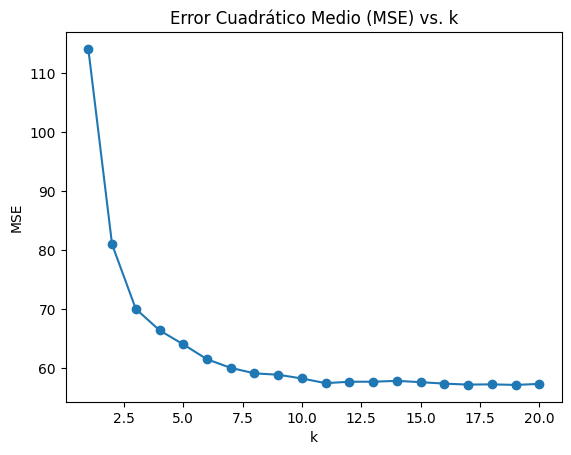

In [40]:
import matplotlib.pyplot as plt

plt.plot(k_values, mse_values, marker="o")
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("Error Cuadrático Medio (MSE) vs. k")
plt.show()

Visualizo lo siguiente en los diferentes K:


|    k    |  Valor del MSE  |
|---------|-----------------|
|   2.5   |        70       |
|   5.0   |        64       |
|   7.5   |        60       |
|   10.0  |        56       |
|   12.5  |        59       |
|   15.0  |        59       |
|   17.5  |        57       |
      

Visualicé que el punto de equilibrio sería en `k=10`, porque observé un equilibrio entre la respectiva presición y la generalización.

# **Tercer Punto:** Añadir nuevas variables que puedan mejorar el rendimiento.

Algunas variables nuevas que pueden mejorar que hacen parte del dataset original y pueden ayudar a mejorar el rendimiento actual son:


*   `Attendance (%)`: La justificación sería que posiblemente estudiantes con mayor asistencia podrían tener hábitos de estudio más consistentes.
*   `Midterm_Score` y `Final_Score`: La justificación sería que las calificaciones altas podrían correlacionarse con más horas de estudio.
*   `Sleep_Hours_per_Night`: La justificación sería que menos horas de sueño podrían indicar más horas de estudio (o viceversa).
*   `Projects_Score` y `Quizzes_Avg`: La justificación sería que las actividades académicas específicas podrían requerir más tiempo de estudio.
*   `Total_Score`: La justificación sería que la puntuación global académica como proxy de dedicación.



In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Cargar datos
df = pd.read_csv("/content/Students_Grading_Dataset_Biased.csv")

# Crear nuevas variables (ejemplo)
df["Stress_Sleep_Interaction"] = df["Stress_Level (1-10)"] * df["Sleep_Hours_per_Night"]
df["Score_Improvement"] = df["Final_Score"] - df["Midterm_Score"]

In [51]:
# Definir columnas
numerical_cols = ["Stress_Level (1-10)", "Sleep_Hours_per_Night", "Attendance (%)", "Midterm_Score", "Final_Score"]
categorical_cols = ["Grade", "Internet_Access_at_Home", "Family_Income_Level"]

# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(), categorical_cols)
    ])

X = preprocessor.fit_transform(df)
y = df["Study_Hours_per_Week"]

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Instead of using fillna on the NumPy array, use SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo con nuevas variables
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 60.740129800000005
